***Sampling Distributions Dance Party!***

You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

We going to use adjusted spotify dataset from kaggle.com with removed some unnecessary columns.

Load the data and observe its content

In [7]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# load in the spotify dataset
spotify_data = pd.read_csv('spotify_data.csv')
# preview the dataset
print(spotify_data.head())

     tempo  danceability  energy  instrumentalness  liveness  valence
0  156.985         0.831   0.814          0.013400    0.0556   0.3890
1  115.080         0.719   0.493          0.000000    0.1180   0.1240
2  218.050         0.850   0.893          0.000004    0.3720   0.0391
3  186.948         0.476   0.781          0.000000    0.1140   0.1750
4  147.988         0.798   0.624          0.000000    0.1660   0.5910


For this project, we are going to focus on the tempo variable. This column gives the beats per minute (bpm) of each song in spotify_data.csv

In [8]:
#select the relevant column
song_tempos = spotify_data.tempo

Now let's create helper functions to calculate statistics:
* choose_statistic(): allows us to choose a statistic we want to calculate for our sampling and population distributions. 
* population_data(): allows us to plot the population distribution of a dataframe with one function call.
* sampling_distribution(): allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics.

In [9]:
# choose_statistic() 
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

In [10]:
# population_data()
def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

In [12]:
# sampling_distribution()
def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

Let's plot population distribution for the song tempos

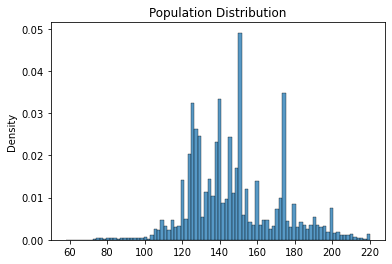

<Figure size 432x288 with 0 Axes>

In [13]:
population_distribution(song_tempos)

Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs.

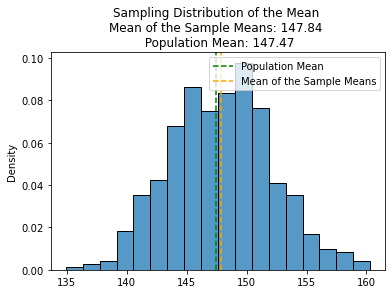

<Figure size 432x288 with 0 Axes>

In [14]:
sampling_distribution(song_tempos, 30, "Mean")

Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs.

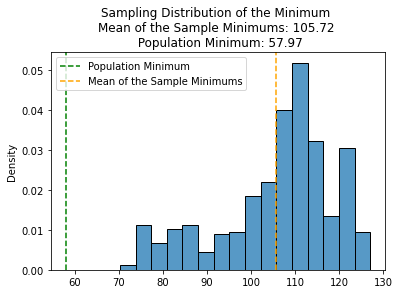

<Figure size 432x288 with 0 Axes>

In [15]:
sampling_distribution(song_tempos, 30, "Minimum")

Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs.

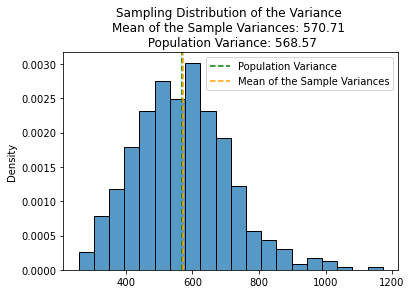

<Figure size 432x288 with 0 Axes>

In [16]:
sampling_distribution(song_tempos, 30, "Variance")

We have a good sense of some sample statistics now that we’ve investigated sampling distributions. Let’s take our analysis further by calculating probabilities.

First, calculate the population mean and population standard deviation of song_tempos

In [17]:
population_mean = np.mean(song_tempos) 
print("Average tempo is {}".format(population_mean))
population_std = np.std(song_tempos)
print("Standard deviation is {}".format(population_std))

Average tempo is 147.4740559035556
Standard deviation is 23.8443414956797


Calculate standard error of the sampling distribution of the sample mean with a sample size of 30.

In [18]:
standard_error = population_std/30**0.5
print("Standard error is {}".format(standard_error))

Standard error is 4.353361235346748


You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

Using Cumulative Distribution Function (CDF) and knowing mean and std calculate the probability that the sample mean of 30 selected songs is less than 140bpm. 

In [19]:
print("The probability of observing an average tempo of 140bpm or lower from a sample of 30 songs is {} ".format(stats.norm.cdf(140,population_mean,standard_error)))

The probability of observing an average tempo of 140bpm or lower from a sample of 30 songs is 0.04300355015962668 


You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

Using population_mean and standard_error in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.

In [20]:
print("The probability of observing an average tempo of 150bpm or higher from a sample of 30 songs is {}".format(1-stats.norm.cdf(150,population_mean,standard_error)))

The probability of observing an average tempo of 150bpm or higher from a sample of 30 songs is 0.28088028101807083
